#  Es 01.1

a) Si richiede una stima per il calcolo di $\langle r \rangle = \int_0^1 r dr$ e della sua incertezza a seguito di $10^4$  esperimenti divisi in $100$ blocchi. 

Il grafico indica il valore ottenuto con il blocking method e relativa incertezza (in azzurro) e il valore atteso (in rosso).

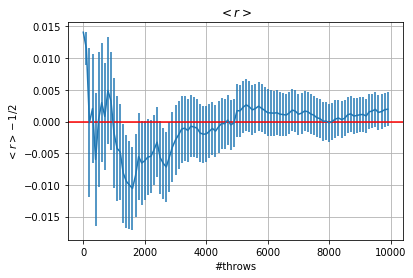

In [9]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

data_file=np.loadtxt('01.1/Data01_1.dat')

x=data_file [:,0]
sum_prog=data_file [:,1]
err_prog=data_file[:,2]

plt.errorbar(x,sum_prog-0.5,yerr=err_prog)
plt.xlabel('#throws')
plt.ylabel('$<r>-1/2$')
plt.title("$<r>$")
plt.grid(True)
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

b) Si richiede una stima per il calcolo di $\sigma^2 = \int_0^1 (r-1/2)^2 dr$ e della sua incertezza a seguito di $10^4$  esperimenti divisi in $100$ blocchi.

Il grafico indica il valore ottenuto con il blocking method e relativa incertezza (in azzurro) e il valore atteso (in rosso).

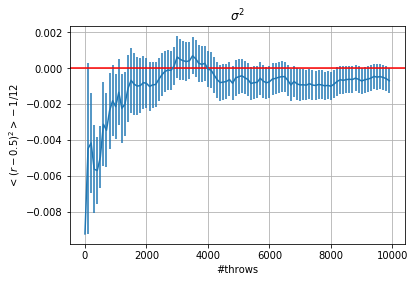

In [10]:
data_file=np.loadtxt('01.1/Data01_2.dat')

x=data_file [:,0]
sum_prog=data_file [:,1]
err_prog=data_file[:,2]

plt.errorbar(x,sum_prog-1/12,yerr=err_prog)
plt.xlabel('#throws')
plt.ylabel('$<(r-0.5)^2>-1/12$')
plt.title("$\sigma^2$")
plt.grid(True)
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

c) Si richiede l'implementazione del test del $\chi^2$ per il generatore di numeri casuali. Per tale test divido l'intervallo $[0,1]$ in $100$ intervalli identici e genero $10^4$ numeri casuali per $100$ esperimenti. Ci aspettiamo un valore di $\chi^2 \simeq100$ per ogni esperimento. 

Il grafico mostra il risultato di tale test per ogni esperimento (in azzurro) e il valore atteso (in rosso).

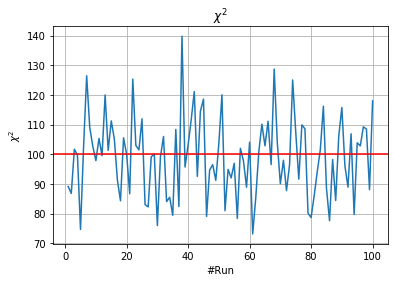

In [3]:
data_file=np.loadtxt('01.1/Data01_3.dat')

x=data_file [:,0]
chi=data_file [:,1]


plt.plot (x,chi)
plt.xlabel('#Run')
plt.ylabel('$\chi^2$')
plt.title("$\chi^2$")
plt.grid(True)
plt.axhline(y=100, color='r', linestyle='-')
plt.show()

# Es 01.2

a) Sono stati aggiunti due metodi per il calcolo di numeri casuali distribuiti secondo una distribuzione Laurentiana ed Esponenziale utilizzando il metodo della cumulata inversa e dunque sfruttando le seguenti equazioni:
$$x=\mu + \Gamma\tan(\pi(r-\frac1 2))$$ per la Laurentziana e 
$$x=-\frac1 \lambda \log(1-r) $$
per l'esponenziale.

Dove $r$ è un numero uniformemente distribuito nell'intervallo $[0,1]$, $x$ è la variabile distribuita secondo la distribuzione richiesta e $\mu, \Gamma$ e $\lambda$ sono i parametri della distribuzione.

b) Si richiede di implementare degli istogrammi realizzati con $10^4$ realizzazioni di $S_N = \frac{1}{N}\sum_{i=1}^N x_i$ (per $N= 1,2,10,100$) dove $x_i$ è la variabile distribuita secondo il metodo richiesto.

Si mostrano gli istogrammi per tutte e quattro le $S_N$ richieste ottenuti per le distribuzioni di:
1. $x_i$ distribuita come un dado standard,
2. $x_i$ distribuita con distrubuzione esponenziale,
3. $x_i$ distribuita con distribuzione laurentziana

## 1. DADO STANDARD

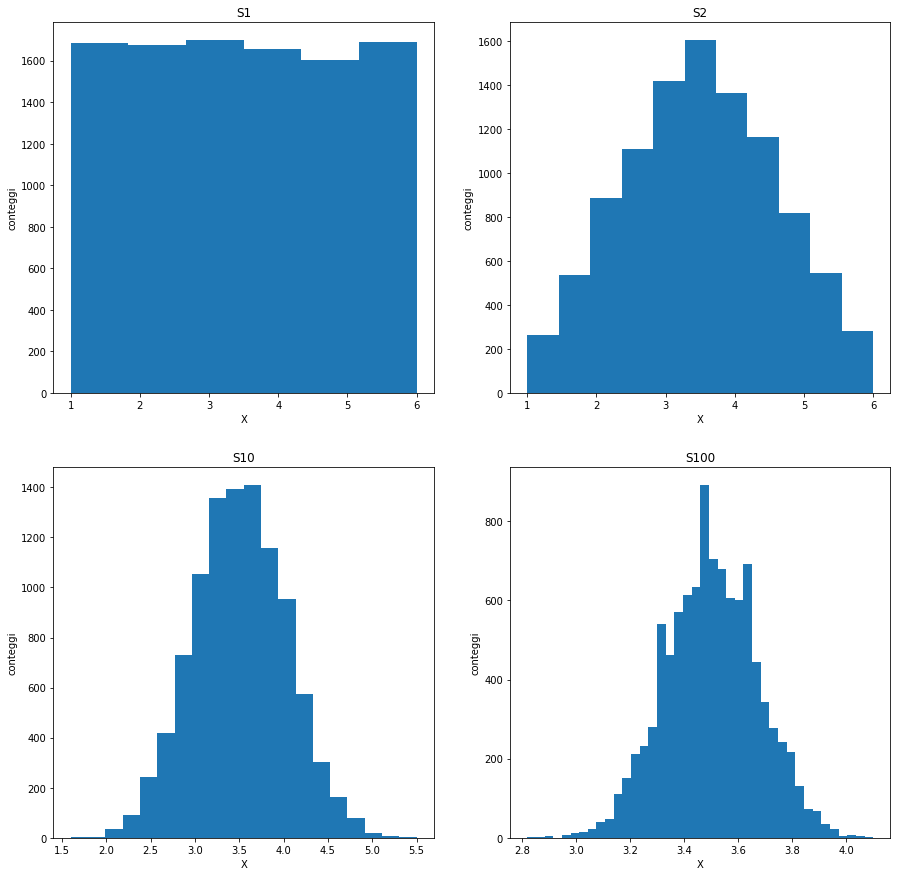

In [4]:
data_file=np.loadtxt('01.2/DataDado.dat')

s1=data_file [:,0]
s2=data_file [:,1]
s10=data_file [:,2]
s100_dado=data_file [:,3]

figure, axes = plt.subplots(nrows=2, ncols=2,figsize=(15,15))
axes[0,0].hist(s1,6)
axes[0,0].set_title('S1')

axes[0,1].hist (s2,11)
axes[0,1].set_title('S2')

axes[1,0].hist (s10,20)
axes[1,0].set_title('S10')

data_dado,bins_dado,_=axes[1,1].hist(s100_dado,40)
axes[1,1].set_title('S100')

for ax in axes.flat:
    ax.set(xlabel='X', ylabel='conteggi')

plt.show()

## 2. DISTRIBUZIONE ESPONENZIALE

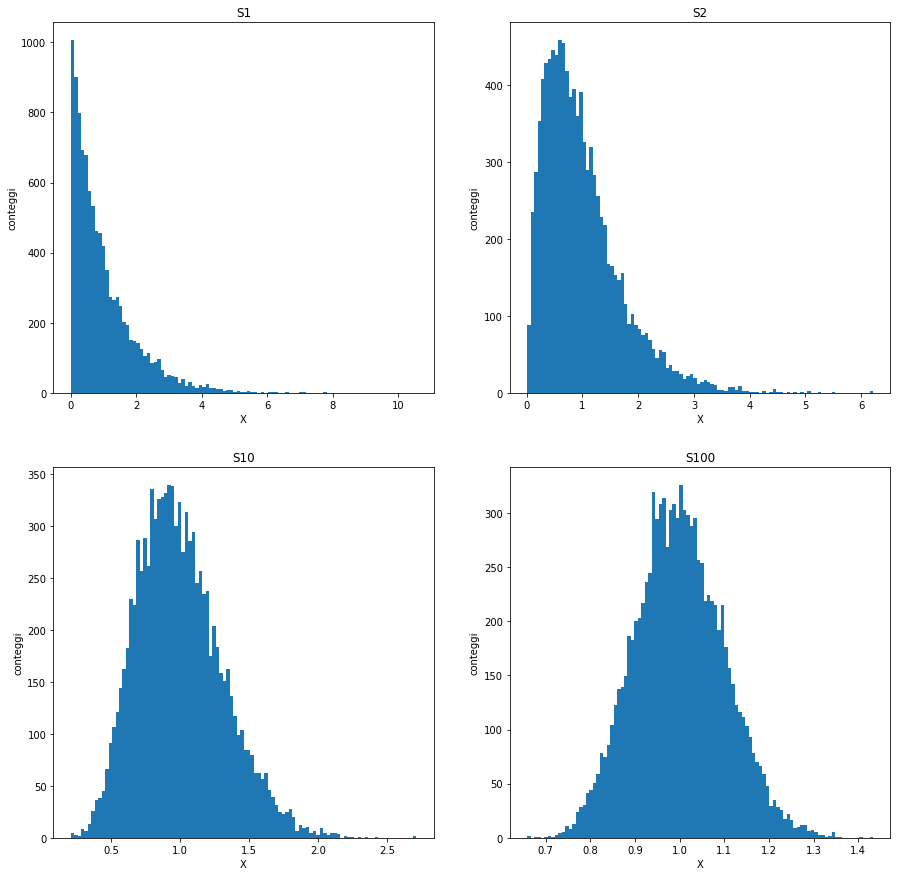

In [5]:
data_file=np.loadtxt('01.2/DataExp.dat')

s1=data_file [:,0]
s2=data_file [:,1]
s10=data_file [:,2]
s100_exp=data_file [:,3]

figure, axes = plt.subplots(nrows=2, ncols=2,figsize=(15,15))
axes[0,0].hist(s1,100)
axes[0,0].set_title('S1')

axes[0,1].hist (s2,100)
axes[0,1].set_title('S2')

axes[1,0].hist (s10,100)
axes[1,0].set_title('S10')

data_exp,bins_exp,_=axes[1,1].hist(s100_exp,100)
axes[1,1].set_title('S100')

for ax in axes.flat:
    ax.set(xlabel='X', ylabel='conteggi')

plt.show()

## 3. DISTRIBUZIONE LORENTZIANA

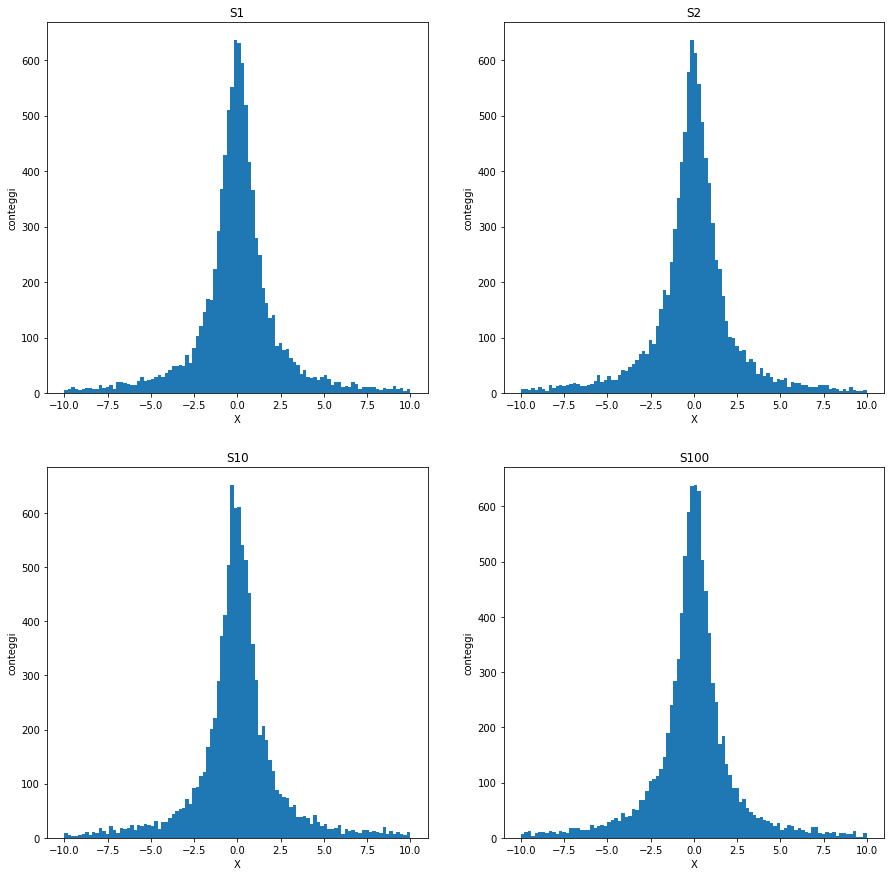

In [6]:
data_file=np.loadtxt('01.2/DataLorentz.dat')

s1=data_file [:,0]
s2=data_file [:,1]
s10=data_file [:,2]
s100_lor=data_file [:,3]

figure, axes = plt.subplots(nrows=2, ncols=2,figsize=(15,15))
axes[0,0].hist(s1,100,(-10,10))
axes[0,0].set_title('S1')

axes[0,1].hist (s2,100,(-10,10))
axes[0,1].set_title('S2')

axes[1,0].hist (s10,100,(-10,10))
axes[1,0].set_title('S10')

data_lor,bins_lor,_=axes[1,1].hist(s100_lor,100,(-10,10))
axes[1,1].set_title('S100')

for ax in axes.flat:
    ax.set(xlabel='X', ylabel='conteggi')

plt.show()

Si nota che nel caso di dado standard e distribuzione esponenziale possiamo fittare la distribuzione s100 con una distribuzione gaussiana mentre nel caso della Laurentziana no, infatti è più opportuno usare una distribuzione del tipo Cauchy-Lorentz cioè:
$$p(x)=\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}$$
Si vedano le figure sotto in cui si mostrano i fit gaussiani effettuati per il dado standard e il dado esponenziale.

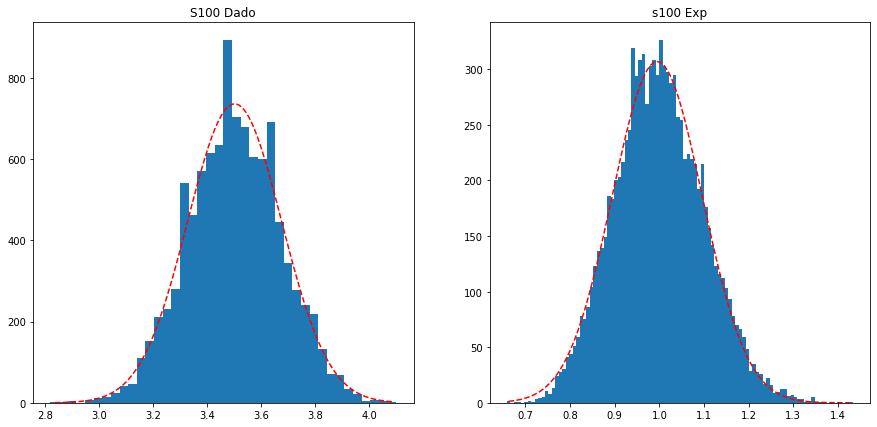

In [7]:
import pylab as py
import numpy as np
from scipy import optimize

# Equation for Gaussian
def f(x, a, b, c):
    return a * py.exp(-(x - b)**2.0 / (2 * c**2))

x = [0.5 * (bins_dado[i] + bins_dado[i+1]) for i in range(len(bins_dado)-1)]
y = data_dado

figure, axes = plt.subplots(nrows=1, ncols=2,figsize=(15,7))
popt, pcov = optimize.curve_fit(f, x, y)
x_fit = py.linspace(x[0], x[-1], 100)
y_fit = f(x_fit, *popt)
axes[0].hist(s100_dado,40)
axes[0].plot(x_fit, y_fit, "r--")
axes[0].set_title("S100 Dado")

x2 = [0.5 * (bins_exp[i] + bins_exp[i+1]) for i in range(len(bins_exp)-1)]
y2 = data_exp

popt, pcov = optimize.curve_fit(f, x2, y2)

x2_fit = py.linspace(x2[0], x2[-1], 100)
y2_fit = f(x2_fit, *popt)
axes[1].hist(s100_exp,100)
axes[1].plot(x2_fit, y2_fit, "r--")
axes[1].set_title("s100 Exp")



plt.show()

# Es 01.3

Si richiede di simulare l'esperimento di Buffon per 10000 volte in cui vengono effettuati per ognuno 10000 lanci.

Si mostra il grafico ottenuto col blocking method sulla simulazione e relative barre d'errore (in azzurro) e valore atteso (in rosso).

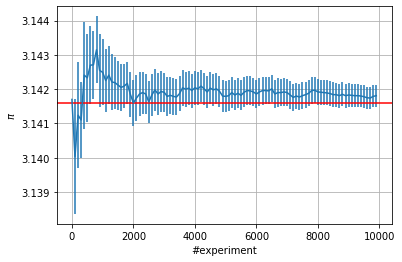

In [8]:
data_file=np.loadtxt('01.3/dataBuffon.dat')

x=data_file [:,0]
sum_prog=data_file [:,1]
err_prog=data_file[:,2]

plt.errorbar(x,sum_prog,yerr=err_prog)
plt.xlabel('#experiment')
plt.ylabel('$\pi$')
plt.grid(True)
plt.axhline(y=math.pi, color='r', linestyle='-')
plt.show()